<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/01-intro/DataHandling_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please, fill in before you start:

First Name: Tianxiong

Last Name: Yu

Group: мээп224

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [goodevening13](https://github.com/goodevening13), [abdalazizrashid](https://github.com/abdalazizrashid) and [rogachevai](https://github.com/rogachevai) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Get the Titanic dataset:

In [1]:
import wget

In [3]:
url = "https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv"
wget.download(url)

'train.csv'

#### Notice: raw data without preprocessing

In [1]:
import pandas as pd
data = pd.read_csv("train.csv", index_col="PassengerId")
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [5]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

# <YOUR CODE>
data_task1 = data.copy()
data_task1 = data_task1[["Survived","Pclass"]].groupby(["Pclass"])["Survived"].agg(["sum","count"])
data_task1["SurvivalRate"] = data_task1.apply(lambda x: round(x["sum"]/x["count"],2),axis=1)
data_task1[["SurvivalRate"]]


,SurvivalRate
Pclass,
1,0.63
2,0.47
3,0.24


## Task 2 (1 point)

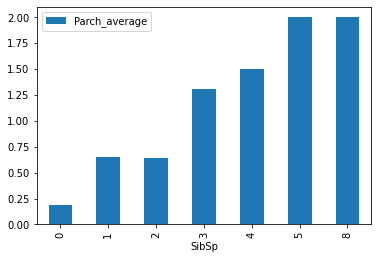

In [6]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

# <YOUR CODE>
import matplotlib.pyplot as plt
data_task2 = data.copy()
data_task2 = data_task2[["Parch","SibSp"]].groupby(["SibSp"]).mean().rename(columns={"Parch":'Parch_average'})
data_task2.plot(kind="bar")
plt.show()


## Task 3 (2 points)

In [7]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def feature_selection_and_preprocessing(dataset):
    # <YOUR CODE>
    features = dataset.copy()
    features = features[["Pclass","Sex","Age","SibSp","Parch"]]
    features["Age"] = features["Age"].fillna(features["Age"].median())
    features["Sex"].replace({"female": 0,"male": 1}, inplace=True)
    features[["Pclass","Age","SibSp","Parch"]].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    return features

    '''# E.g.:
    features = dataset[["Fare", "Parch"]].copy()
    features["Fare"] /= features["Fare"].mean()
    features['Fare'] *= 1
    return features'''

model = KNeighborsClassifier(
    # <YOUR CODE>
    # E.g.
    n_neighbors=3
)

# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))


Test accuracy: 0.84


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

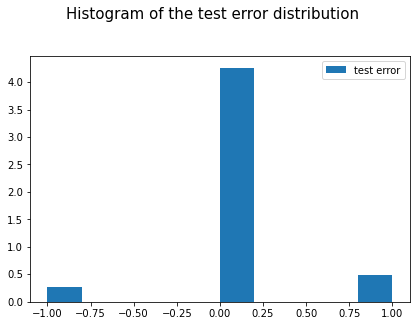

In [8]:
from sklearn.model_selection import train_test_split

# <YOUR CODE>
data_task4 = data.copy()
X_train, X_test, y_train, y_test = train_test_split(
    feature_selection_and_preprocessing(data_task4.drop('Survived', axis=1)), data_task4['Survived'], test_size=100, random_state=2)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
predictions = model.predict(X_train)

f,ax = plt.subplots()
plt.tight_layout()
ax.hist(y_train - predictions, bins=10, label="test error", density=True)
plt.suptitle('Histogram of the test error distribution', fontsize=15, y=1.12)
ax.legend(loc="best")


In [9]:
# one more approach
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, predictions)

array([[449,  42],
       [ 76, 224]], dtype=int64)